# Photovoltaics (PV) Simulation
Here the output from the Meter generator is grabbed and the simulated power value in the photovoltaics is read. At the end, it is saved in a file.

In [ ]:
%reload_ext autoreload
%autoreload 2
import numpy as np, pandas as pd
import shared_params as params
from photovoltaic import Photovoltaic as PV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime as dt, time

# Run Photovoltaic
Initialize it, and then let it wait for the incoming messages.

In [ ]:
pv = PV()

Start listening the queue for the messages coming from the Meter.

**!!Note!!**:  Next line of the code is a blocking code, where the execution waits for the incoming messages through the channel. You need to interrupt it to end the waiting.

In [ ]:
pv.listen_queue()

### Visualize
Here the output of the simulation is visualized. 

Write the name of the csv file (which should be under the **data** folder) to the __output_file_name__ variable below. 

(array([737406.   , 737406.125, 737406.25 , 737406.375, 737406.5  ,
        737406.625, 737406.75 , 737406.875, 737407.   ]),
 <a list of 9 Text xticklabel objects>)

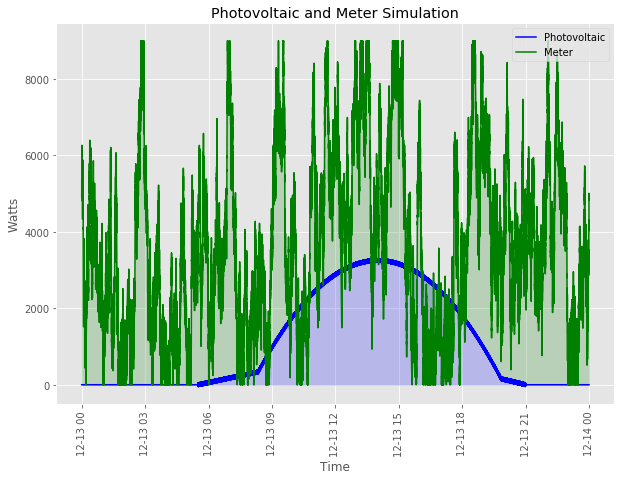

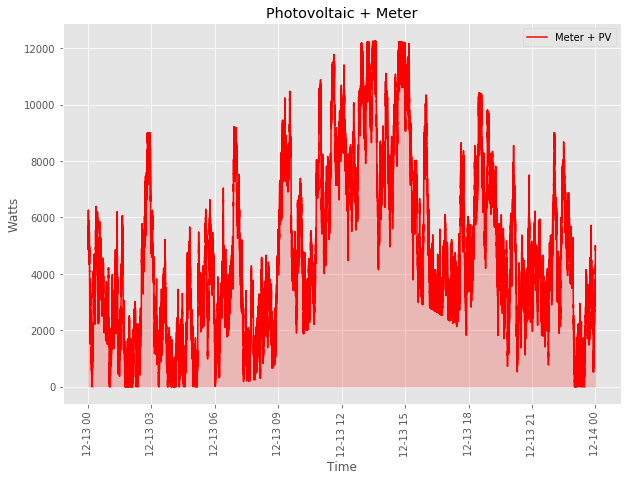

In [44]:
output_file_name = "2019-12-1-16-57.csv"
df = pd.read_csv(
    "./data/"+output_file_name,index_col=0,
    parse_dates=True,infer_datetime_format=True
)
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(df.PV,color="blue",label="Photovoltaic")
ax.fill_between(df.index ,df.PV,0,alpha=0.2, color="blue")

ax.plot(df.Meter,color="green", label="Meter")
ax.fill_between(df.index ,df.Meter,df.PV,alpha=0.2, color="green")

#ax.plot(df.Total,color="red",label="Total")
#ax.fill_between(df.index ,df.Total,df.Meter,alpha=0.2, color="red")


ax.set_ylabel("Watts")
ax.set_xlabel("Time")
plt.title("Photovoltaic and Meter Simulation")
plt.legend(loc="upper right")
plt.xticks(rotation="vertical")



fig,ax = plt.subplots(figsize=(10,7))
ax.plot(df.Total,color="red",label="Meter + PV")
ax.fill_between(df.index ,df.Total,0,alpha=0.2, color="red")

plt.title("Photovoltaic + Meter")
plt.legend()
ax.set_ylabel("Watts")
ax.set_xlabel("Time")
plt.xticks(rotation="vertical")